In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [2]:
csv_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/U.S.%20Gasoline%20and%20Diesel%20Retail%20Prices%201995-2021/PET_PRI_GND_DCUS_NUS_W.csv")

In [3]:
csv_data.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [5]:
df = csv_data.copy()
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [6]:
df.isnull().sum()

Date    0
A1      0
A2      0
A3      0
R1      0
R2      0
R3      0
M1      0
M2      0
M3      0
P1      0
P2      0
P3      0
D1      0
dtype: int64

In [7]:
df.dtypes

Date     object
A1      float64
A2      float64
A3      float64
R1      float64
R2      float64
R3      float64
M1      float64
M2      float64
M3      float64
P1      float64
P2      float64
P3      float64
D1      float64
dtype: object

In [8]:
df.loc[-1] = df.max(axis=0) 
top_1 = df.tail(1)
top_1

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
-1,12/31/2018,4.165,4.102,4.301,4.114,4.054,4.247,4.229,4.153,4.387,4.344,4.283,4.459,4.764


In [9]:
top_1 == df.max()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
-1,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
top_1 = top_1.drop('Date', axis=1)
top_1

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
-1,4.165,4.102,4.301,4.114,4.054,4.247,4.229,4.153,4.387,4.344,4.283,4.459,4.764


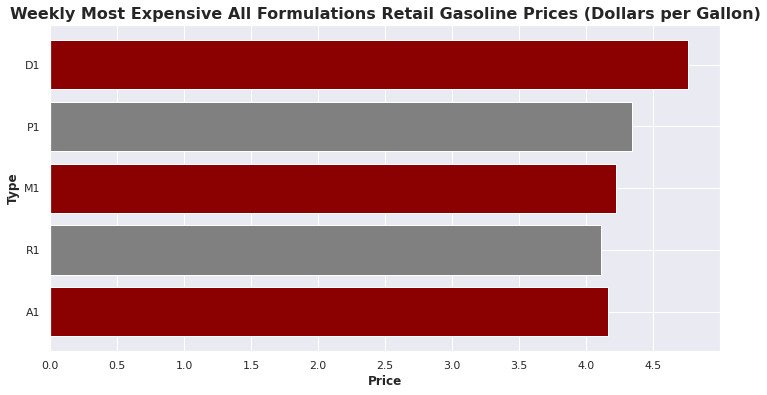

In [11]:
plt.figure(figsize= (12,6))
sns.set_style("darkgrid")
plt.barh('A1', top_1['A1'], color = 'darkred')
plt.barh('R1', top_1['R1'], color = 'gray')
plt.barh('M1', top_1['M1'], color = 'darkred')
plt.barh('P1', top_1['P1'], color = 'gray')
plt.barh('D1', top_1['D1'], color = 'darkred')
plt.xticks(np.arange(0, 5, step=0.5))
plt.title("Weekly Most Expensive All Formulations Retail Gasoline Prices (Dollars per Gallon)", fontsize = 16, fontweight = 'bold')
plt.ylabel('Type', fontsize = 12, fontweight = 'bold')
plt.xlabel("Price", fontsize = 12, fontweight = 'bold')
plt.show()

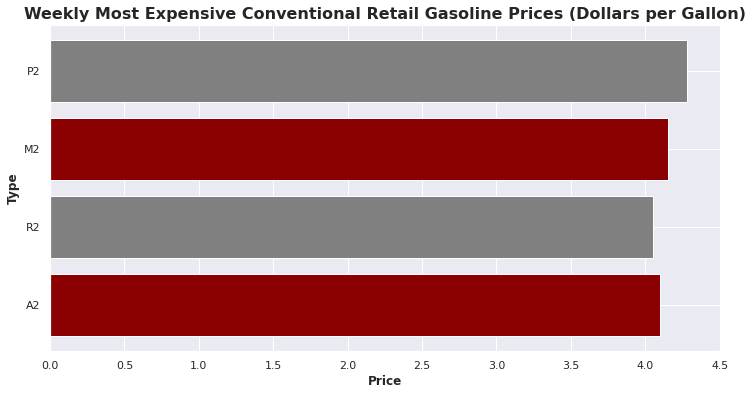

In [12]:
plt.figure(figsize= (12,6))
sns.set_style("darkgrid")
plt.barh('A2', top_1['A2'], color = 'darkred')
plt.barh('R2', top_1['R2'], color = 'gray')
plt.barh('M2', top_1['M2'], color = 'darkred')
plt.barh('P2', top_1['P2'], color = 'gray')
plt.xticks(np.arange(0, 5, step=0.5))
plt.title("Weekly Most Expensive Conventional Retail Gasoline Prices (Dollars per Gallon)", fontsize = 16, fontweight = 'bold')
plt.ylabel('Type', fontsize = 12, fontweight = 'bold')
plt.xlabel("Price", fontsize = 12, fontweight = 'bold')
plt.show()

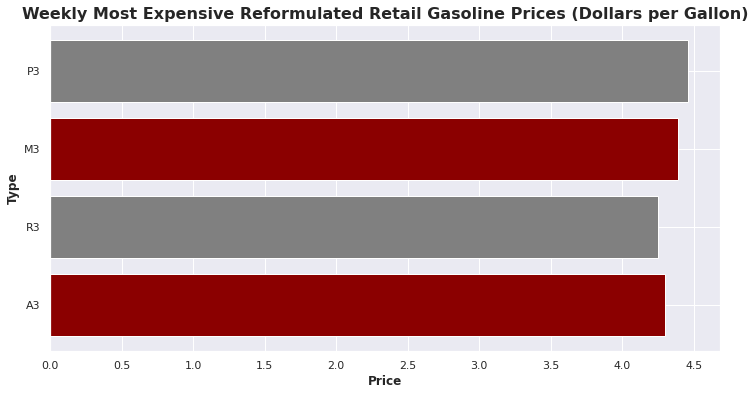

In [13]:
plt.figure(figsize= (12,6))
sns.set_style("darkgrid")
plt.barh('A3', top_1['A3'], color = 'darkred')
plt.barh('R3', top_1['R3'], color = 'gray')
plt.barh('M3', top_1['M3'], color = 'darkred')
plt.barh('P3', top_1['P3'], color = 'gray')
plt.xticks(np.arange(0, 5, step=0.5))
plt.title("Weekly Most Expensive Reformulated Retail Gasoline Prices (Dollars per Gallon)", fontsize = 16, fontweight = 'bold')
plt.ylabel('Type', fontsize = 12, fontweight = 'bold')
plt.xlabel("Price", fontsize = 12, fontweight = 'bold')
plt.show()

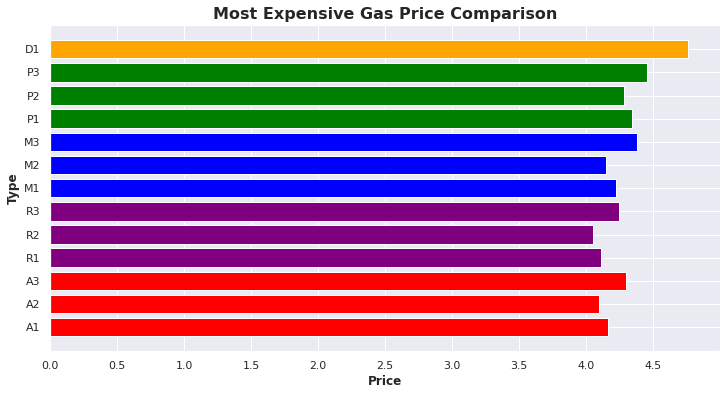

In [14]:
plt.figure(figsize= (12,6))
sns.set_style("darkgrid")


plt.barh('A1', top_1['A1'], color = 'red')
plt.barh('A2', top_1['A2'], color = 'red')
plt.barh('A3', top_1['A3'], color = 'red')
plt.barh('R1', top_1['R1'], color = 'purple')
plt.barh('R2', top_1['R2'], color = 'purple')
plt.barh('R3', top_1['R3'], color = 'purple')
plt.barh('M1', top_1['M1'], color = 'blue')
plt.barh('M2', top_1['M2'], color = 'blue')
plt.barh('M3', top_1['M3'], color = 'blue')
plt.barh('P1', top_1['P1'], color = 'green')
plt.barh('P2', top_1['P2'], color = 'green')
plt.barh('P3', top_1['P3'], color = 'green')
plt.barh('D1', top_1['D1'], color = 'orange')


plt.xticks(np.arange(0, 5, step=0.5))
plt.title("Most Expensive Gas Price Comparison", fontsize = 16, fontweight = 'bold')
plt.ylabel('Type', fontsize = 12, fontweight = 'bold')
plt.xlabel("Price", fontsize = 12, fontweight = 'bold')
plt.show()

In [15]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.drop(-1, inplace = True)
df

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,year
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,1995
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,1995
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,1995
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,1995
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635,2020
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640,2021
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670,2021
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696,2021


In [16]:
yearly_avg = df.groupby('year').mean()
yearly_avg = yearly_avg.reset_index()
yearly_avg

,year,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,1.157712,1.143538,1.219615,1.110865,1.103308,1.162500,1.200635,1.196000,1.284904,1.297981,1.287154,1.368846,1.109154
1,1996,1.244528,1.230830,1.296849,1.199075,1.191925,1.241792,1.285170,1.280151,1.363962,1.380642,1.370679,1.438057,1.235283
2,1997,1.244250,1.227788,1.306808,1.199038,1.188692,1.252327,1.284192,1.276712,1.377269,1.380058,1.368481,1.446981,1.198308
3,1998,1.071712,1.056212,1.133135,1.029654,1.016654,1.077788,1.121904,1.105885,1.201058,1.213865,1.198788,1.275692,1.043885
4,1999,1.176058,1.155519,1.260154,1.135808,1.115981,1.195154,1.233596,1.207019,1.331115,1.319635,1.296558,1.399692,1.120519
5,2000,1.522731,1.500692,1.605135,1.483808,1.462308,1.542865,1.576462,1.548750,1.670308,1.662942,1.639385,1.741250,1.490769
6,2001,1.460302,1.422019,1.548849,1.420057,1.383830,1.498415,1.513283,1.467792,1.615226,1.602472,1.561396,1.691623,1.400509
7,2002,1.385962,1.352212,1.452885,1.344500,1.312673,1.408423,1.439423,1.399212,1.516654,1.530154,1.495731,1.593981,1.318750
8,2003,1.603019,1.554577,1.700635,1.561096,1.515808,1.654712,1.658231,1.600615,1.769558,1.747808,1.697365,1.841942,1.509327
9,2004,1.894692,1.851077,1.983712,1.852212,1.811615,1.937365,1.950365,1.897846,2.052115,2.041654,1.997385,2.123904,1.809942


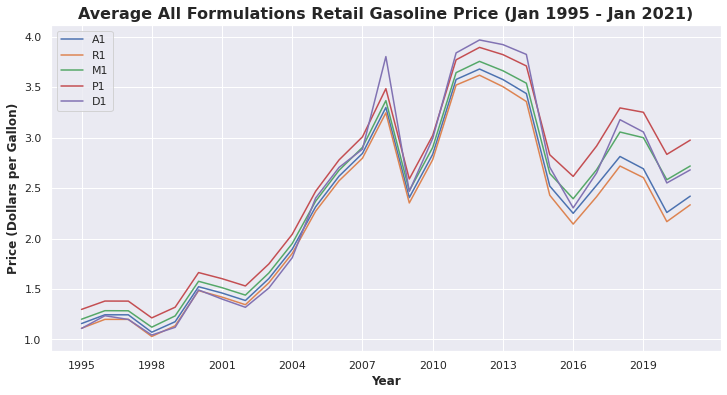

In [17]:
plt.figure(figsize= (12,6))
sns.set_style("darkgrid")
plt.plot(yearly_avg['year'], yearly_avg['A1'])
plt.plot(yearly_avg['year'], yearly_avg['R1'])
plt.plot(yearly_avg['year'], yearly_avg['M1'])
plt.plot(yearly_avg['year'], yearly_avg['P1'])
plt.plot(yearly_avg['year'], yearly_avg['D1'])
plt.xticks(np.arange(1995, 2021, step=3))
plt.legend(['A1','R1','M1','P1','D1'], loc = 'upper left')
plt.title("Average All Formulations Retail Gasoline Price (Jan 1995 - Jan 2021)",fontsize = 16, fontweight = 'bold')
plt.xlabel("Year",fontsize = 12, fontweight = 'bold')
plt.ylabel("Price (Dollars per Gallon)",fontsize = 12, fontweight = 'bold')
plt.show()

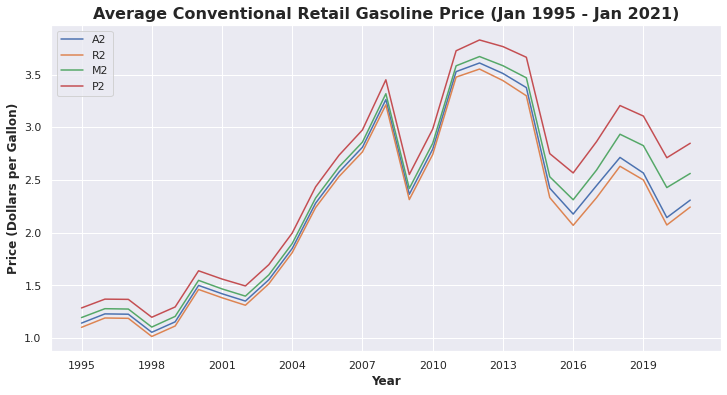

In [18]:
plt.figure(figsize= (12,6))
sns.set_style("darkgrid")
plt.plot(yearly_avg['year'], yearly_avg['A2'])
plt.plot(yearly_avg['year'], yearly_avg['R2'])
plt.plot(yearly_avg['year'], yearly_avg['M2'])
plt.plot(yearly_avg['year'], yearly_avg['P2'])
plt.xticks(np.arange(1995, 2021, step=3))
plt.legend(['A2','R2','M2','P2'], loc = 'upper left')
plt.title("Average Conventional Retail Gasoline Price (Jan 1995 - Jan 2021)",fontsize = 16, fontweight = 'bold')
plt.xlabel("Year",fontsize = 12, fontweight = 'bold')
plt.ylabel("Price (Dollars per Gallon)",fontsize = 12, fontweight = 'bold')
plt.show()

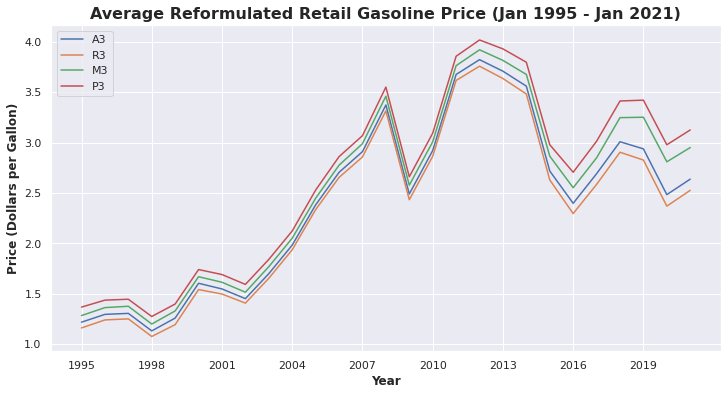

In [19]:
plt.figure(figsize= (12,6))
sns.set_style("darkgrid")
plt.plot(yearly_avg['year'], yearly_avg['A3'])
plt.plot(yearly_avg['year'], yearly_avg['R3'])
plt.plot(yearly_avg['year'], yearly_avg['M3'])
plt.plot(yearly_avg['year'], yearly_avg['P3'])
plt.xticks(np.arange(1995, 2021, step=3))
plt.legend(['A3','R3','M3','P3'], loc = 'upper left')
plt.title("Average Reformulated Retail Gasoline Price (Jan 1995 - Jan 2021)",fontsize = 16, fontweight = 'bold')
plt.xlabel("Year",fontsize = 12, fontweight = 'bold')
plt.ylabel("Price (Dollars per Gallon)",fontsize = 12, fontweight = 'bold')
plt.show()

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,year
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,1995
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,1995
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,1995
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,1995
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,1995


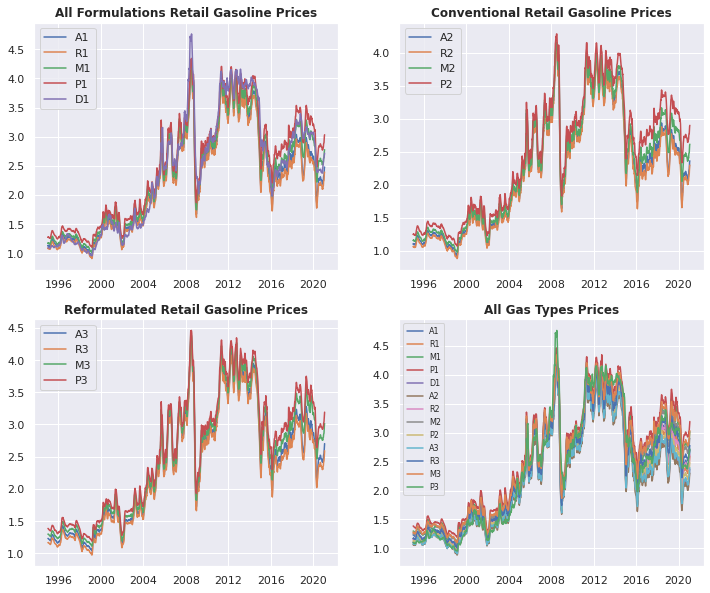

In [21]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2,2, figsize = (12,10))
axes[0,0].plot(df['Date'], df['A1'])
axes[0,0].plot(df['Date'], df['R1'])
axes[0,0].plot(df['Date'], df['M1'])
axes[0,0].plot(df['Date'], df['P1'])
axes[0,0].plot(df['Date'], df['D1'])
axes[0,0].set_title("All Formulations Retail Gasoline Prices", fontweight= 'bold')
axes[0,0].legend(['A1', 'R1','M1','P1','D1'])
############################################################################################################
axes[0,1].plot(df['Date'], df['A2'])
axes[0,1].plot(df['Date'], df['R2'])
axes[0,1].plot(df['Date'], df['M2'])
axes[0,1].plot(df['Date'], df['P2'])
axes[0,1].set_title("Conventional Retail Gasoline Prices", fontweight= 'bold')
axes[0,1].legend(['A2', 'R2','M2','P2'])
############################################################################################################
axes[1,0].plot(df['Date'], df['A3'])
axes[1,0].plot(df['Date'], df['R3'])
axes[1,0].plot(df['Date'], df['M3'])
axes[1,0].plot(df['Date'], df['P3'])
axes[1,0].set_title("Reformulated Retail Gasoline Prices", fontweight= 'bold')
axes[1,0].legend(['A3', 'R3','M3','P3'])
############################################################################################################
axes[1,1].plot(df['Date'], df['A3'])
axes[1,1].plot(df['Date'], df['R3'])
axes[1,1].plot(df['Date'], df['M3'])
axes[1,1].plot(df['Date'], df['P3'])
axes[1,1].plot(df['Date'], df['A2'])
axes[1,1].plot(df['Date'], df['R2'])
axes[1,1].plot(df['Date'], df['M2'])
axes[1,1].plot(df['Date'], df['P2'])
axes[1,1].plot(df['Date'], df['A1'])
axes[1,1].plot(df['Date'], df['R1'])
axes[1,1].plot(df['Date'], df['M1'])
axes[1,1].plot(df['Date'], df['P1'])
axes[1,1].plot(df['Date'], df['D1'] )
axes[1,1].set_title("All Gas Types Prices", fontweight= 'bold')
axes[1,1].legend(['A1', 'R1','M1','P1','D1','A2', 'R2','M2','P2','A3', 'R3','M3','P3'],prop={'size': 8})

In [22]:
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,year
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,1995
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,1995
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,1995
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,1995
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,1995


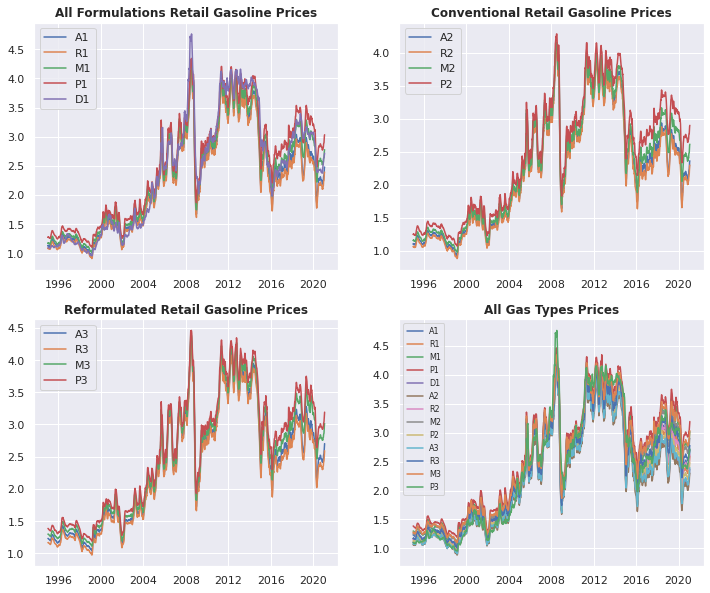

In [23]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2,2, figsize = (12,10))
axes[0,0].plot(df['Date'], df['A1'])
axes[0,0].plot(df['Date'], df['R1'])
axes[0,0].plot(df['Date'], df['M1'])
axes[0,0].plot(df['Date'], df['P1'])
axes[0,0].plot(df['Date'], df['D1'])
axes[0,0].set_title("All Formulations Retail Gasoline Prices", fontweight= 'bold')
axes[0,0].legend(['A1', 'R1','M1','P1','D1'])
############################################################################################################
axes[0,1].plot(df['Date'], df['A2'])
axes[0,1].plot(df['Date'], df['R2'])
axes[0,1].plot(df['Date'], df['M2'])
axes[0,1].plot(df['Date'], df['P2'])
axes[0,1].set_title("Conventional Retail Gasoline Prices", fontweight= 'bold')
axes[0,1].legend(['A2', 'R2','M2','P2'])
############################################################################################################
axes[1,0].plot(df['Date'], df['A3'])
axes[1,0].plot(df['Date'], df['R3'])
axes[1,0].plot(df['Date'], df['M3'])
axes[1,0].plot(df['Date'], df['P3'])
axes[1,0].set_title("Reformulated Retail Gasoline Prices", fontweight= 'bold')
axes[1,0].legend(['A3', 'R3','M3','P3'])
############################################################################################################
axes[1,1].plot(df['Date'], df['A3'])
axes[1,1].plot(df['Date'], df['R3'])
axes[1,1].plot(df['Date'], df['M3'])
axes[1,1].plot(df['Date'], df['P3'])
axes[1,1].plot(df['Date'], df['A2'])
axes[1,1].plot(df['Date'], df['R2'])
axes[1,1].plot(df['Date'], df['M2'])
axes[1,1].plot(df['Date'], df['P2'])
axes[1,1].plot(df['Date'], df['A1'])
axes[1,1].plot(df['Date'], df['R1'])
axes[1,1].plot(df['Date'], df['M1'])
axes[1,1].plot(df['Date'], df['P1'])
axes[1,1].plot(df['Date'], df['D1'] )
axes[1,1].set_title("All Gas Types Prices", fontweight= 'bold')
axes[1,1].legend(['A1', 'R1','M1','P1','D1','A2', 'R2','M2','P2','A3', 'R3','M3','P3'],prop={'size': 8})